# Algerian Forest Fires 

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 3. RH : Relative Humidity in %: 21 to 90 4. Ws :Wind speed in km/h: 6 to 29 5. Rain: total day in mm: 0 to 16.8 FWI Components 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 8. Drought Code (DC) index from the FWI system: 7 to 220.4 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 11. Fire Weather Index (FWI) Index: 0 to 31.1 12. Classes: two classes, namely Fire and not Fire

### Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/jensontmathew/Downloads/Dataset/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.describe().transpose()

,count,unique,top,freq
day,246,33,01,8
month,245,5,07,62
year,245,2,2012,244
Temperature,245,20,35,29
RH,245,63,64,10
Ws,245,19,14,43
Rain,245,40,0,133
FFMC,245,174,88.9,8
DMC,245,167,7.9,5
DC,245,199,8,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

#### We can see that all the columns are object type 

In [6]:
#by looking at the csv file we can see that csv contains two region data

In [7]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
[features for features in df.columns if df[features].isna().sum()>=1]

['month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ']

In [9]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

### We make a seperate column to identify the seperate data

In [10]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [11]:
df['Region']=df['Region'].astype(int)

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [13]:
df=df.dropna().reset_index(drop=True)

In [14]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [16]:
#remove the 122th column
df=df.drop(122).reset_index(drop=True)

In [17]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [18]:
df.columns=df.columns.str.strip()

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Converting the first 6 column to int type

In [20]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

#### Changing the other columns to float data datatype

In [21]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [22]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [24]:
df1=df.copy()

In [25]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [26]:
#save the csv file
df.to_csv('Algerian forest fires cleaned dataset',index=False)

#### We have completed the data cleaning and is ready for EDA and Model Implementation.

## Exploratory Data Analysis

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [28]:
#dropping the day,month and year column
df1=df.drop(['day','month','year'],axis=1)

In [29]:
df1['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

Here we can see that eventhough there are only two categories ,fire and not fire but it is showing 8 categories 

In [30]:
#Encoding the classes
df1['Classes']=np.where(df1['Classes'].str.contains('not fire'),0,1)

In [31]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

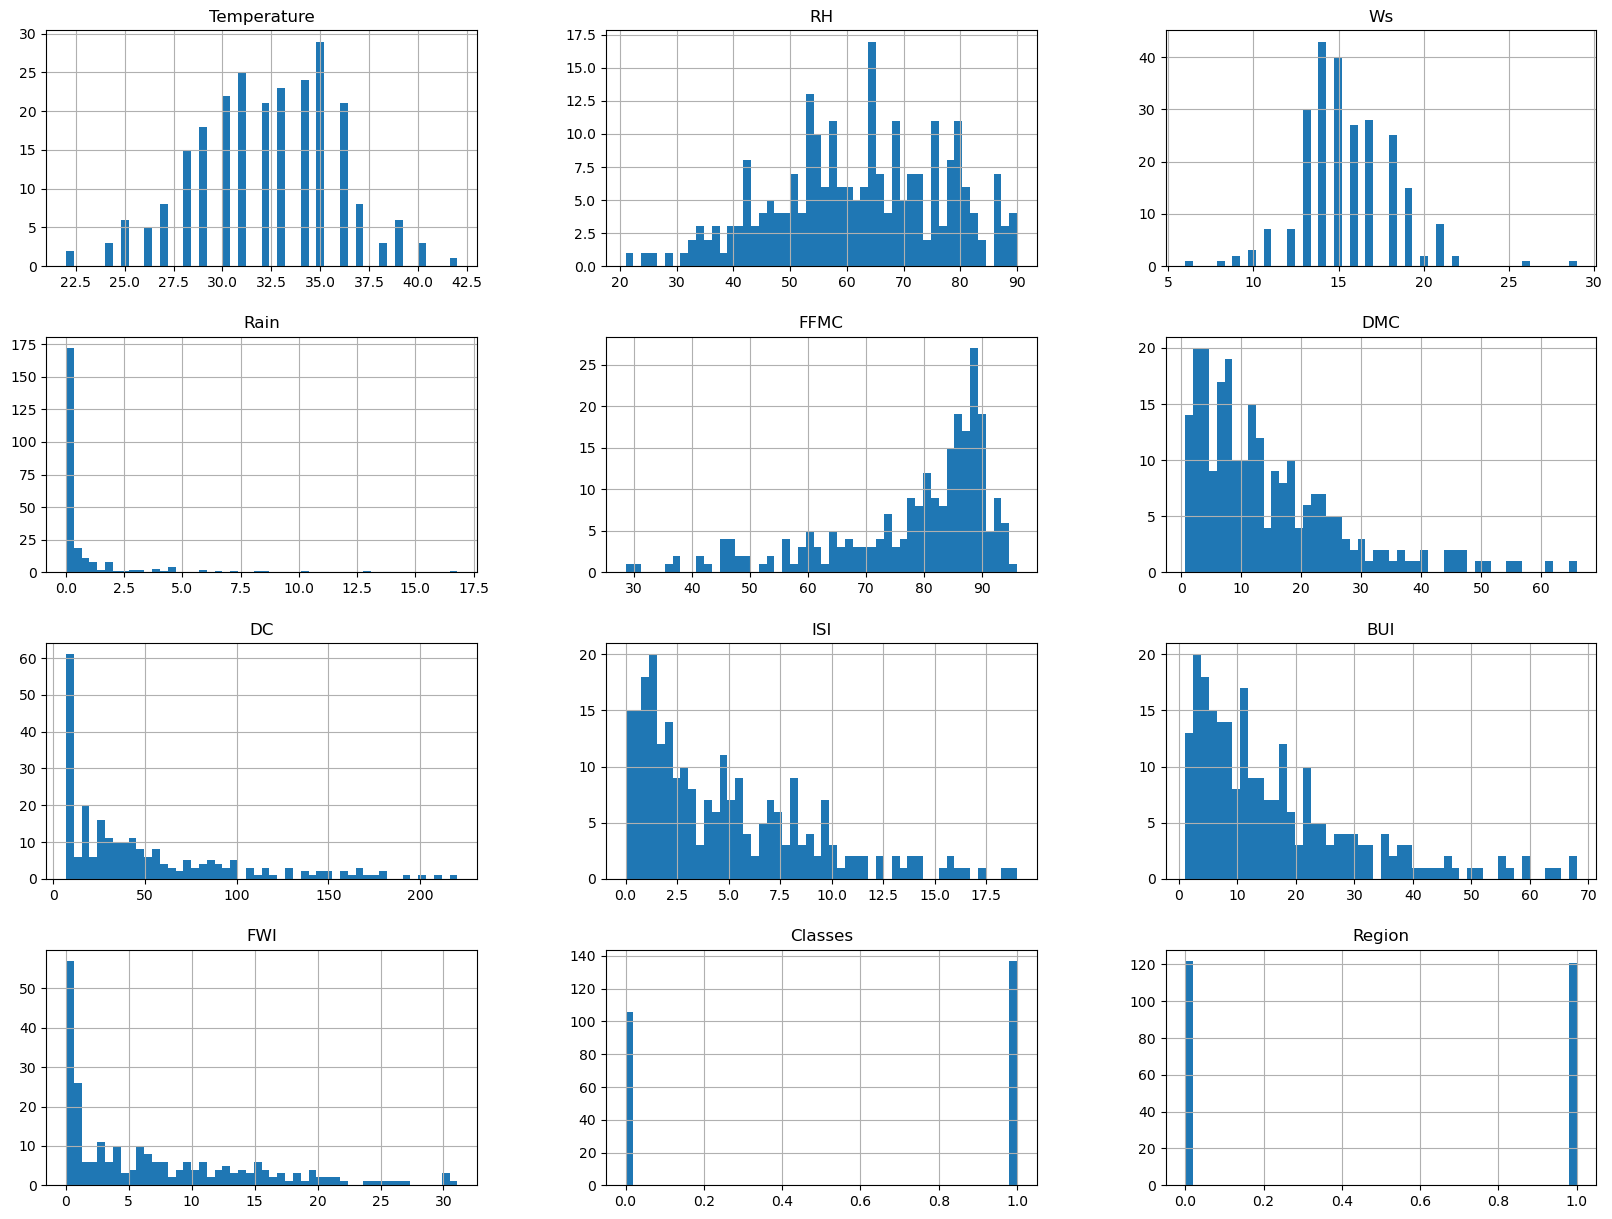

In [32]:
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [33]:
#finding the percentage of classes using pie chart
percent=df1.Classes.value_counts(normalize=True)*100

In [34]:
percent

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1278b0c70>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'not fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'fire')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.4%'),
  Text(0.11943081696919887, -0.587993435301849, '43.6%')])

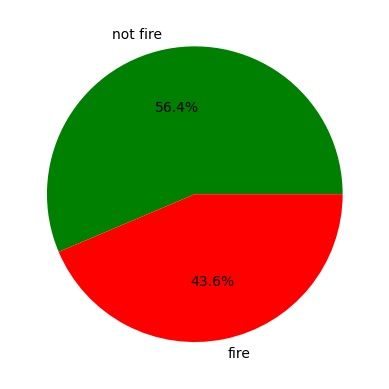

In [35]:
classlabels=['not fire','fire']
plt.pie(percent,labels=classlabels,autopct='%1.1f%%',colors=['green','red'])

In [36]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [37]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

<Axes: >

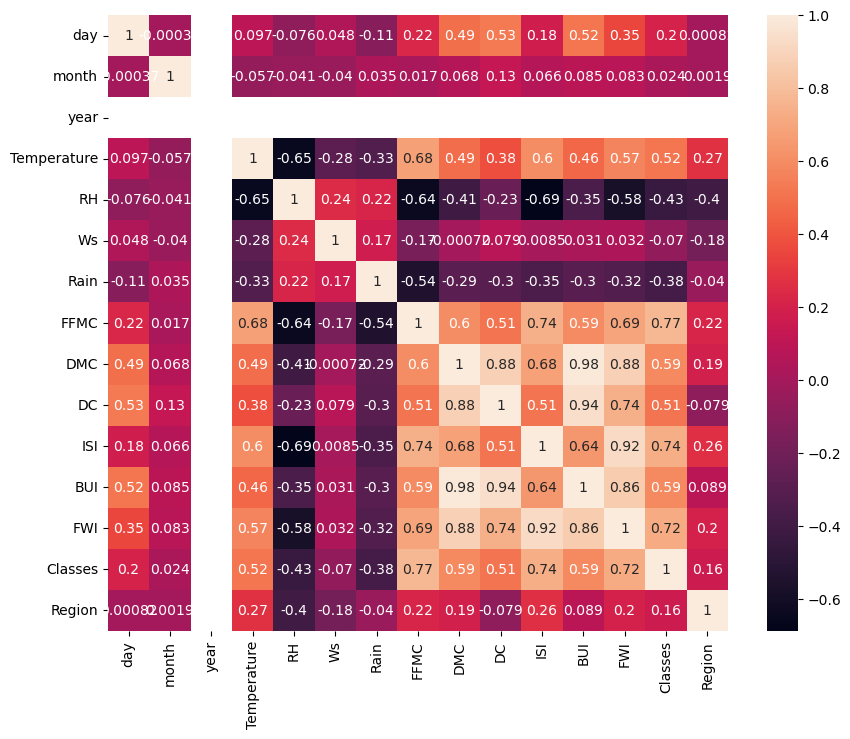

In [38]:
#heatmap to find correlation betwen features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<Axes: >

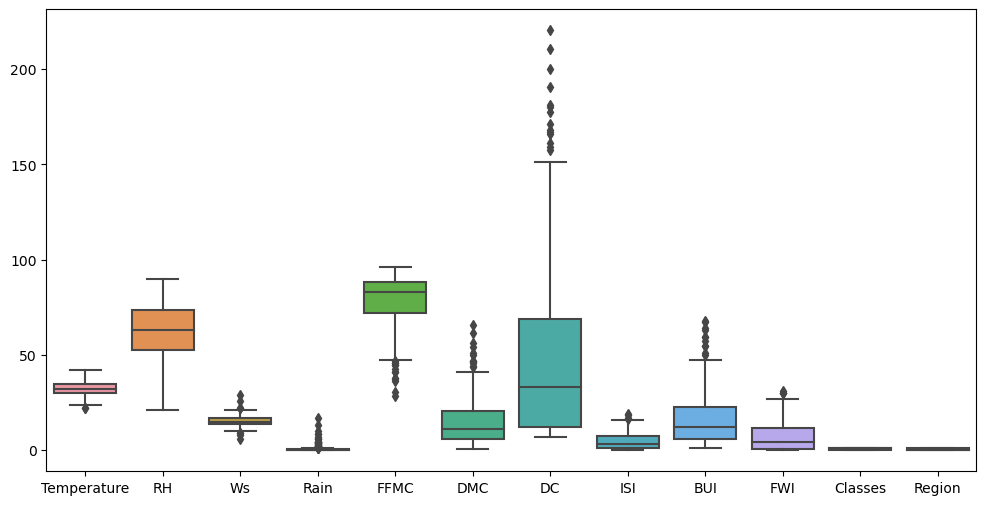

In [39]:
#Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df1)

In [40]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

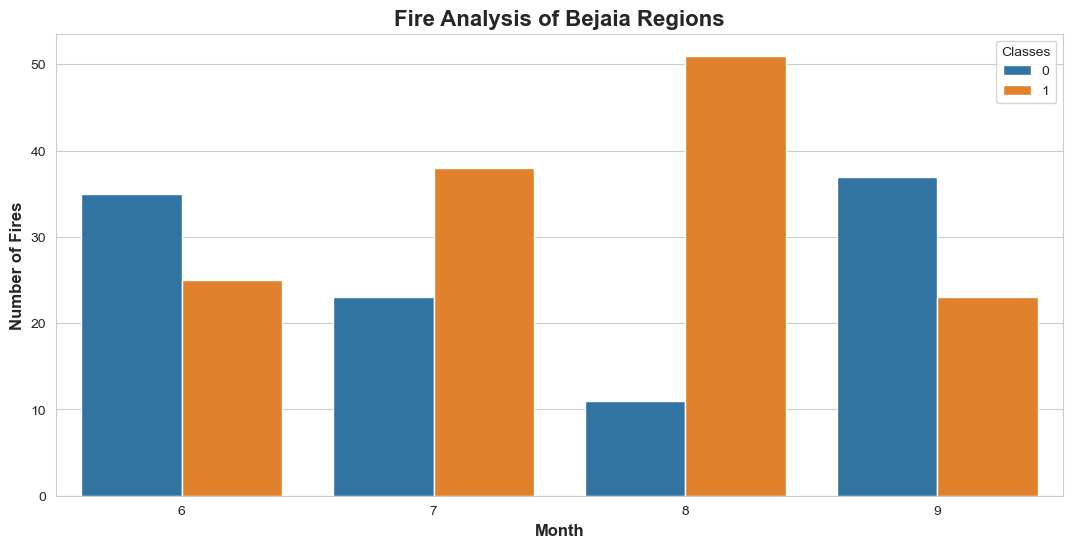

In [42]:
#Monthly Fire Analysis
dftemp1=df.loc[df['Region']==0]
sns.set_style('whitegrid')
plt.figure(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('Month',weight='bold',fontsize=12)
plt.ylabel('Number of Fires',weight='bold',fontsize=12)
plt.title("Fire Analysis of Bejaia Regions",weight='bold',fontsize=16)

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

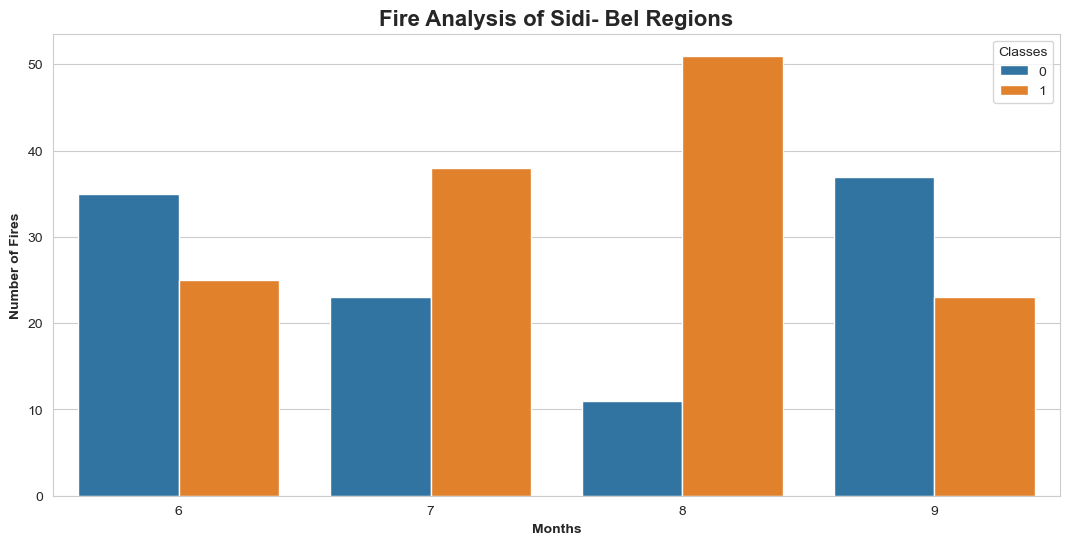

In [43]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold',fontsize=16)

# Feature Selection

In [44]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


## Splitting the Data

In [45]:
x=df1.drop('FWI',axis=1)
y=df['FWI']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<Axes: >

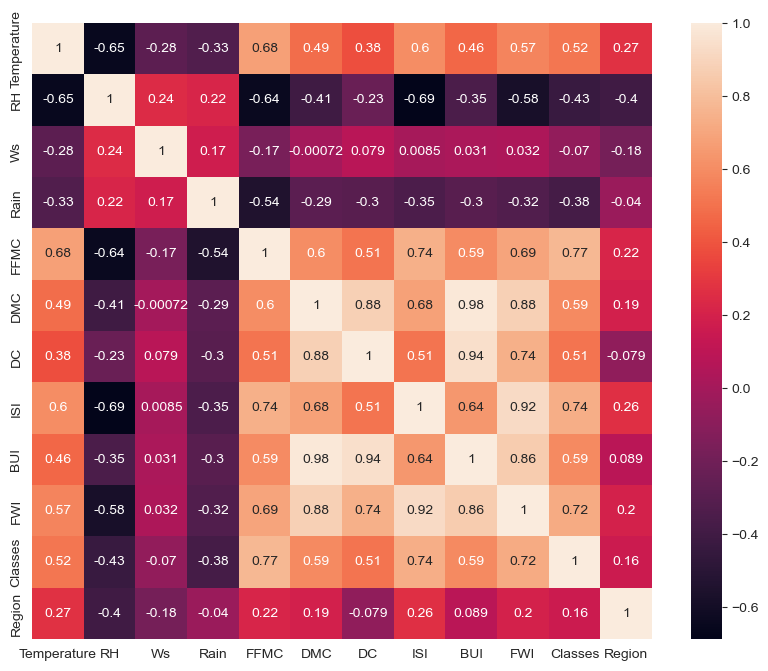

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

In [48]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [49]:
corr_col=correlation(x_train,0.85)

In [50]:
corr_col

{'BUI', 'DC'}

In [51]:
x_train.drop(corr_col,axis=1,inplace=True)
x_test.drop(corr_col,axis=1,inplace=True)
x_train.shape,x_test.shape

((170, 9), (73, 9))

## Scaling the features

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test_sc=scaler.transform(x_test)


Text(0.5, 1.0, 'Data After Scaleing')

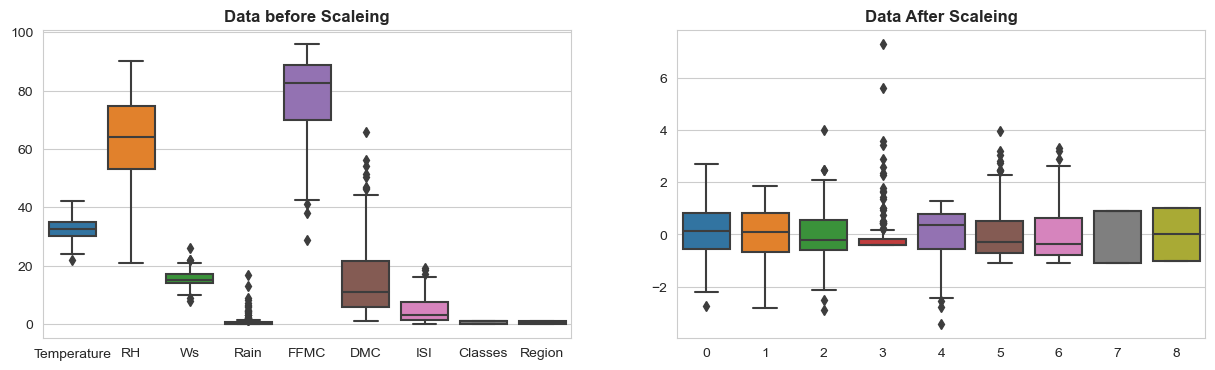

In [53]:
#checking the scaleing brought any changes to the dataset
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title('Data before Scaleing',weight='bold')
plt.subplot(1,2,2)
sns.boxplot(x_train_sc)
plt.title('Data After Scaleing',weight='bold')

# Model  Creation and Training

## Linear Regression

mean absolute error is  0.5648036371485086
R2 Score is  0.9847206874554417


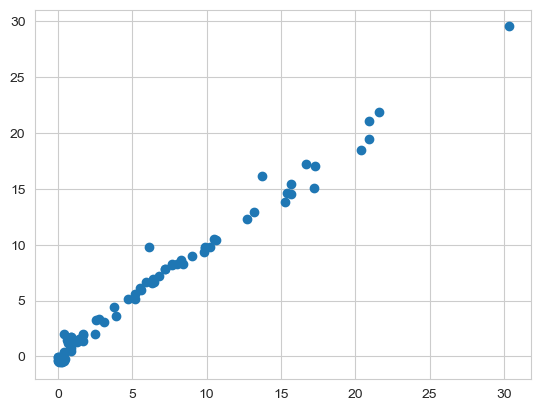

In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_sc,y_train)
y_pred=model.predict(x_test_sc)
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print(f'mean absolute error is  {mean_absolute_error(y_test,y_pred)}')
score_li=r2_score(y_test,y_pred)
print(f'R2 Score is  {score_li}')  
plt.scatter(y_test,y_pred)

(array([ 1.,  0.,  1.,  1.,  3., 23., 27., 12.,  2.,  3.]),
 array([-3.68342355, -3.10651744, -2.52961133, -1.95270522, -1.37579911,
        -0.798893  , -0.2219869 ,  0.35491921,  0.93182532,  1.50873143,
         2.08563754]),
 <BarContainer object of 10 artists>)

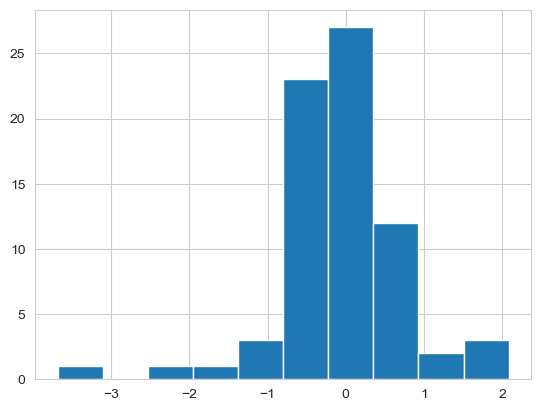

In [55]:
plt.hist(y_test-y_pred)

## Ridge Regression


Mean absolute error 0.5844876727578043
R2 Score 0.9841610358272455


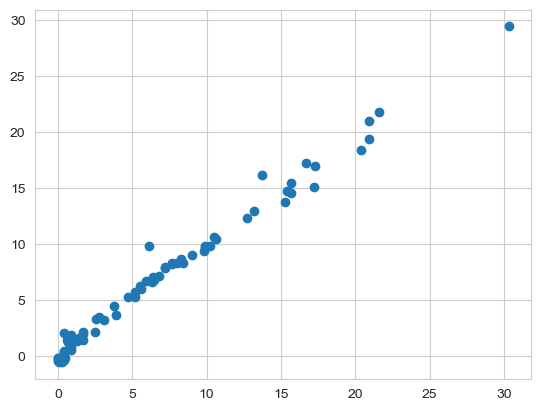

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_sc,y_train)
y_pred=ridge.predict(x_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score_r=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score_r)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7943132619521917
R2 Score 0.976223192919533


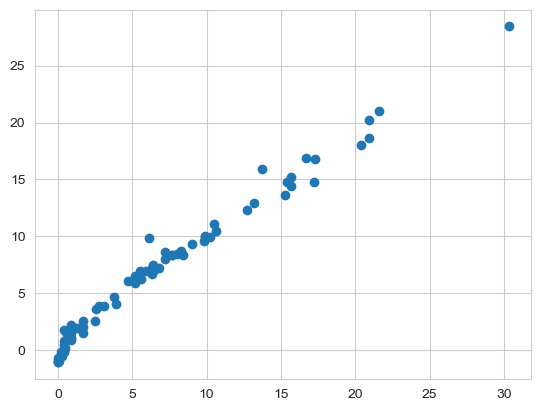

In [57]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_sc,y_train)
y_pred=ridgecv.predict(x_test_sc)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score_r=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score_r)

In [58]:
ridgecv.alpha_

10.0

## Lasso Regression

Mean absolute error 1.120336888239321
R2 Score 0.9511364350928344


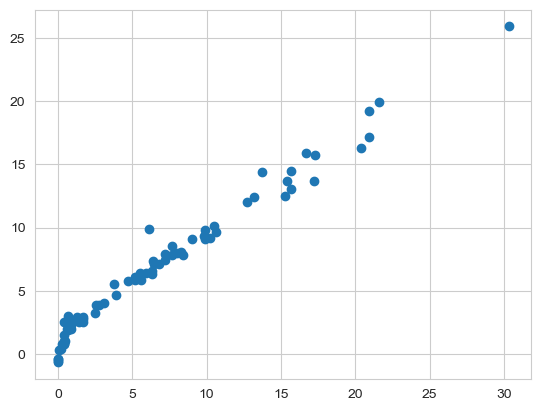

In [59]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_sc,y_train)
y_pred=lasso.predict(x_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score_la=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score_la)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6356015744517415
R2 Score 0.9821627684487946


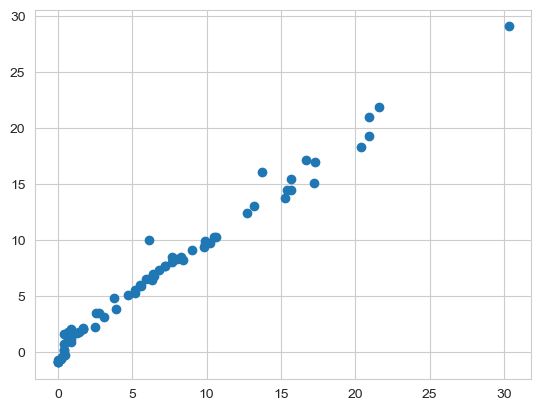

In [60]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_sc,y_train)
lassopred=lassocv.predict(x_test_sc)
mae=mean_absolute_error(y_test,lassopred)
score_la=r2_score(y_test,lassopred)
print("Mean absolute error", mae)
print("R2 Score", score_la)
plt.scatter(y_test,lassopred)

In [61]:
lassocv.alpha_

0.061776031206820514

In [62]:
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [63]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

## ElasticNet Regression

Mean absolute error 1.8554687479717555
R2 Score 0.8804077479376988


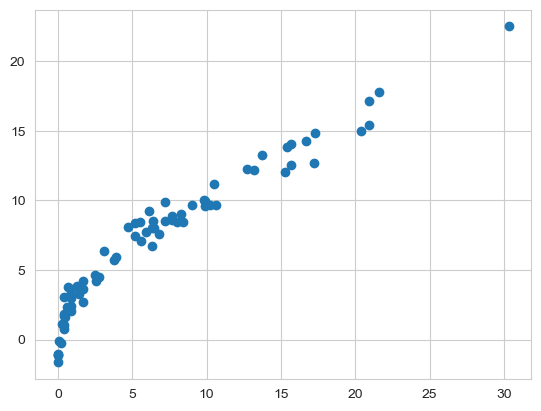

In [64]:
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(x_train_sc,y_train)
y_pred=model.predict(x_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score3=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score3)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6856401038998684
R2 Score 0.9807402447693789


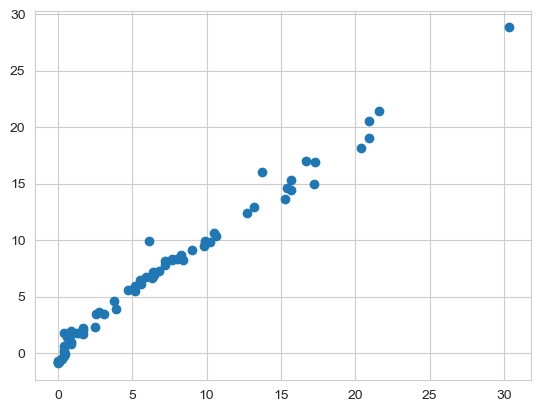

In [65]:
from sklearn.linear_model import ElasticNetCV
elstcv=ElasticNetCV(cv=5)
elstcv.fit(x_train_sc,y_train)
elstpred=elstcv.predict(x_test_sc)
mae=mean_absolute_error(y_test,elstpred)
score_el=r2_score(y_test,elstpred)
print("Mean absolute error", mae)
print("R2 Score", score_el)
plt.scatter(y_test,elstpred)

In [66]:
elstcv.alpha_

0.04987818082990675

In [67]:
elstcv.alphas_

array([14.20548481, 13.24808267, 12.35520624, 11.52250669, 10.74592831,
       10.0216887 ,  9.34626043,  8.71635375,  8.12890068,  7.58103998,
        7.07010326,  6.59360196,  6.14921526,  5.73477873,  5.34827384,
        4.98781808,  4.65165584,  4.3381498 ,  4.04577303,  3.77310146,
        3.51880705,  3.28165124,  3.06047893,  2.85421289,  2.66184849,
        2.48244881,  2.31514007,  2.15910738,  2.01359077,  1.87788149,
        1.75131856,  1.63328555,  1.52320757,  1.42054848,  1.32480827,
        1.23552062,  1.15225067,  1.07459283,  1.00216887,  0.93462604,
        0.87163538,  0.81289007,  0.758104  ,  0.70701033,  0.6593602 ,
        0.61492153,  0.57347787,  0.53482738,  0.49878181,  0.46516558,
        0.43381498,  0.4045773 ,  0.37731015,  0.35188071,  0.32816512,
        0.30604789,  0.28542129,  0.26618485,  0.24824488,  0.23151401,
        0.21591074,  0.20135908,  0.18778815,  0.17513186,  0.16332856,
        0.15232076,  0.14205485,  0.13248083,  0.12355206,  0.11

In [68]:
elstcv.mse_path_

array([[52.48365832, 76.54197718, 44.74158311, 85.19903601, 41.23473866],
       [51.11657704, 76.31684337, 43.46977292, 85.19903601, 40.02609156],
       [49.71276218, 75.09591886, 42.16646986, 84.08066335, 38.78760998],
       [48.27470191, 73.05675857, 40.83434279, 82.6075218 , 37.52179924],
       [46.80524857, 70.96600356, 39.29651483, 80.30820457, 36.23149314],
       [44.79917548, 68.71955852, 37.59148838, 77.70339242, 34.64720168],
       [42.77739395, 65.88291744, 35.69023459, 74.73906   , 32.71908362],
       [40.78107623, 63.03650863, 33.82413626, 71.66453214, 30.77861359],
       [38.79825958, 60.21321042, 31.99942629, 68.61658989, 28.85427986],
       [36.74791619, 57.39601788, 30.2219748 , 65.60415293, 26.99413108],
       [34.75760254, 54.54392464, 28.36240682, 62.55494829, 25.20297498],
       [32.78191975, 51.77526383, 26.5417058 , 59.46678547, 23.48492561],
       [30.87564658, 49.09455238, 24.73382567, 56.43859569, 21.84337042],
       [29.05308156, 46.50547502, 23.0

## Model Score Comparison

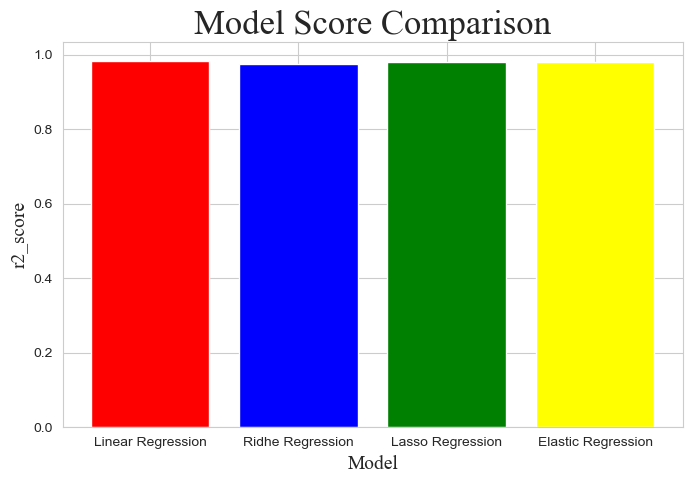

In [69]:
r2_sc=[score_li,score_r,score_la,score_el]
model=['Linear Regression','Ridhe Regression','Lasso Regression','Elastic Regression']
colors=['red','blue','green','yellow']
plt.figure(figsize=(8,5))
plt.bar(model,r2_sc,color=colors)
plt.xlabel('Model',fontsize=14,font='Times New Roman')
plt.ylabel('r2_score',fontsize=14,font='Times New Roman')
plt.title('Model Score Comparison',font='Times New Roman',fontsize=25)
plt.show()